### Decision Tree Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read Iris Dataset

In [2]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Seperate X and Y Feture
PROFIT~Remaining Features

In [5]:
X=df.drop(columns=['PROFIT'])
Y=df[['PROFIT']]

In [6]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Seperate cat con Features for X

In [8]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE'], dtype='object')

In [9]:
X.dtypes

RND      float64
ADMIN    float64
MKT      float64
STATE     object
dtype: object

In [10]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [11]:
cat

['STATE']

In [12]:
con

['RND', 'ADMIN', 'MKT']

## Create a preprocessing pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
# Numerical Pipeline
num_pipe=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])


## Categorical pipeline
cat_pipe= Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])

## Combine both pipelines
pre =ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)])                    

In [15]:
X_pre= pre.fit_transform(X)
X_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [16]:
cols=pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [17]:
X_pre=pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Apply Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [19]:
xtrain.shape

(40, 6)

In [20]:
xtest.shape

(10, 6)

## Create Decision Tree Regessor model
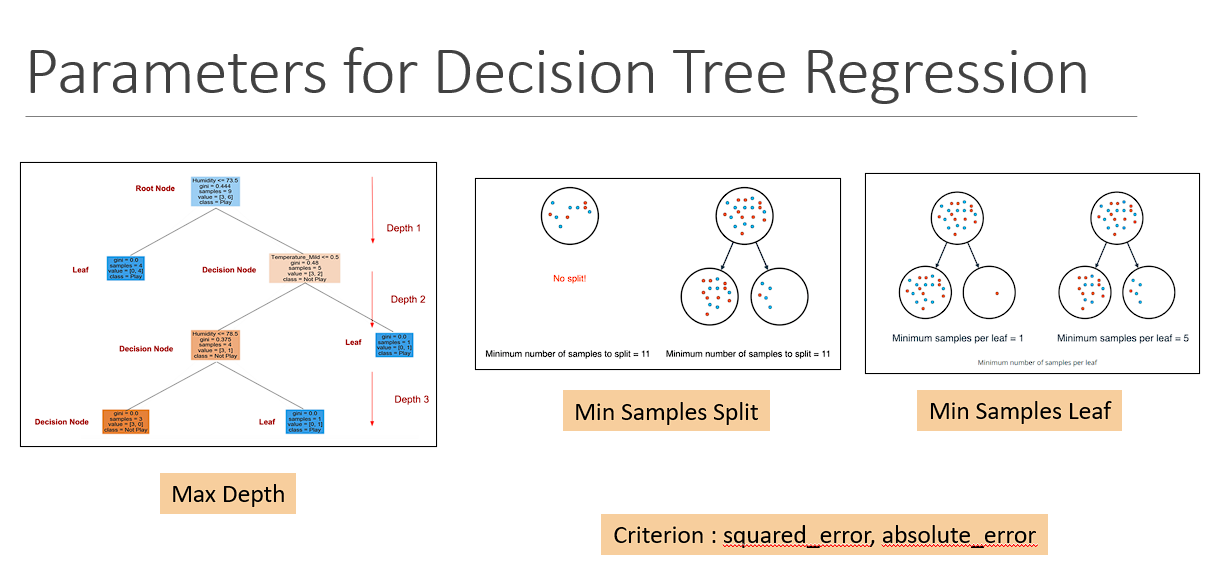

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2, min_samples_split=5, min_samples_leaf=5, criterion='absolute_error')
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                      min_samples_leaf=5, min_samples_split=5)

In [22]:
# R2 Score in training
model.score(xtrain, ytrain)

0.8302351593786227

In [23]:
# R2 Score in testing
model.score(xtest, ytest)

0.871978102686395

## Hyperparameter Tuning of DTR

In [24]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_split':[5,6,7,8,9,10,11],
          'min_samples_leaf':[3,4,5,6,7,8,9,10,11],
          'criterion':['squared_error', 'absolute_error']}

In [25]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11]},
             scoring='neg_mean_squared_error')

In [26]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [27]:
gscv.best_score_

-286977329.94868994

In [28]:
best_dtr=gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=3, min_samples_split=5)

### Evaluate Best model

In [29]:
best_dtr.score(xtrain,ytrain)

0.964491148172637

In [30]:
best_dtr.score(xtest,ytest)

0.9397388817493316

## Predict the profit of startups

In [35]:
ypred_tr=best_dtr.predict(xtrain)
ypred_ts=best_dtr.predict(xtest)

In [36]:
ypred_tr[0:5]

array([ 96778.92, 111313.02, 111313.02, 141585.52, 105008.31])

In [37]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [38]:
ypred_ts[0:5]

array([156122.51,  78019.37,  78019.37, 105008.31, 156122.51])

In [39]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


### Evaluate model on MSE, MAE, R2 Score, RMSE

In [40]:
from PM6def import evaluate_model

In [41]:
evaluate_model(xtrain, ytrain ,xtest ,ytest ,best_dtr)

Training Results :

MSE : 54847052.08
RMSE: 7405.88
MAE : 4473.23
R2  : 0.9645


Testing Results :

MSE : 106948230.95
RMSE: 10341.58
MAE : 6877.47
R2  : 0.9397


## Adjusted R2 score in training

In [42]:
from PM6def import r2_adj
r2_adj(xtrain, ytrain, best_dtr)

0.9580349932949347

##  Predict PROFIT for new startup

In [43]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE'], dtype='object')

In [44]:
dct ={'RND':[15000],
      'ADMIN':[200000],
      'MKT':[100000],
      'STATE':['Florida']}

In [45]:
xnew = pd.DataFrame(dct)
xnew

,RND,ADMIN,MKT,STATE
0,15000,200000,100000,Florida


In [46]:
xnew_pre = pre.transform(xnew)

In [47]:
xnew_pre

array([[-1.29226304,  2.83583667, -0.9170987 ,  0.        ,  1.        ,
         0.        ]])

In [48]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,-1.292263,2.835837,-0.917099,0.0,1.0,0.0


In [49]:
pred = best_dtr.predict(xnew_pre)
pred

array([78019.37])